## 1- Importing Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.dates as mdates
import plotly.graph_objects as go
from scipy.stats import pointbiserialr 
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb

### 1.1- Explore the Dataset

In [86]:
stores = pd.read_csv('data/stores.csv')
features = pd.read_csv('data/features/features.csv')
train = pd.read_csv('data/train/train.csv')
test = pd.read_csv('data/test/test.csv')

In [87]:
display(stores.head())
display(features.head())
display(train.head())
display(test.head())

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [88]:
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [89]:
features_test = features[(features['Date'] == '2010-02-05') & (features['Store']==1)]
train_test = train[(train['Date'] == '2010-02-05') & (train['Store']==1)]
display(features_test.head())
display(train_test.head())
print(features_test.shape)
print(train_test.shape)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
143,1,2,2010-02-05,50605.27,False
286,1,3,2010-02-05,13740.12,False
429,1,4,2010-02-05,39954.04,False
572,1,5,2010-02-05,32229.38,False


(1, 12)
(73, 5)


In [90]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


### 1.2- Merging Data

In [91]:
train_merged = train.merge(stores, on=['Store'], how='left')
display(train_merged)
print(train.shape)
print(train_merged.shape)
print(stores.shape)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


(421570, 5)
(421570, 7)
(45, 3)


In [92]:
features = features.drop(columns=['IsHoliday'])
train_final = train_merged.merge(features, on=['Store', 'Date'], how='left')

In [93]:
display(train_final.head())
print(train_final.shape)
print(train_merged.shape)
print(features.shape)
print(train.shape)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


(421570, 16)
(421570, 7)
(8190, 11)
(421570, 5)


In [94]:
test_merged = test.merge(stores, on=['Store'], how='left')
test_final = test_merged.merge(features, on=['Store', 'Date'], how='left')

In [95]:
display(test_final.head())
print(test_final.shape)
print(test_merged.shape)
print(features.shape)
print(test.shape)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


(115064, 15)
(115064, 6)
(8190, 11)
(115064, 4)


### 1.3 - Data Cleaning

In [96]:
def markdown_null_to_zero(train_final):
    train_final['MarkDown1'] = train_final['MarkDown1'].fillna(0)
    train_final['MarkDown2'] = train_final['MarkDown2'].fillna(0)
    train_final['MarkDown3'] = train_final['MarkDown3'].fillna(0)
    train_final['MarkDown4'] = train_final['MarkDown4'].fillna(0)
    train_final['MarkDown5'] = train_final['MarkDown5'].fillna(0)
    return train_final

In [97]:
train_final = markdown_null_to_zero(train_final)
display(train_final[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MarkDown1  421570 non-null  float64
 1   MarkDown2  421570 non-null  float64
 2   MarkDown3  421570 non-null  float64
 3   MarkDown4  421570 non-null  float64
 4   MarkDown5  421570 non-null  float64
dtypes: float64(5)
memory usage: 16.1 MB


None

In [98]:
train_final.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [99]:
train_final.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

In [100]:
# train_final.to_excel('data/train_dummy.xlsx', index=False)

### 1.4- EDA

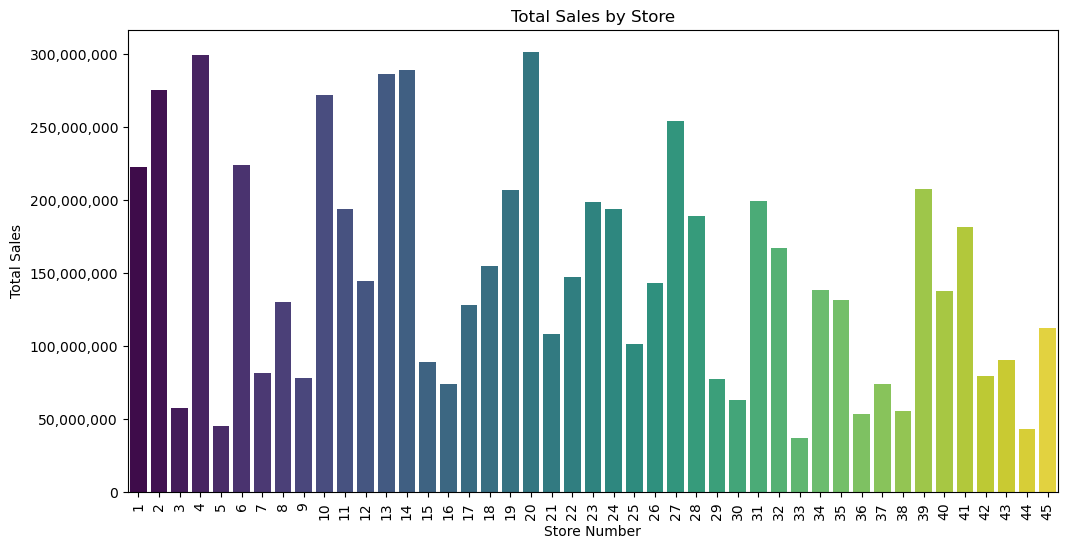

In [101]:
# Group by store and sum up sales
store_sales = train_final.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

# Plot sales per store
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=store_sales.index, y=store_sales.values, hue=store_sales.index, palette="viridis", legend=False)

plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.title("Total Sales by Store")
plt.xticks(rotation=90)  # Rotate store numbers for better visibility

# Format Y-axis tick labels with exact values and commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

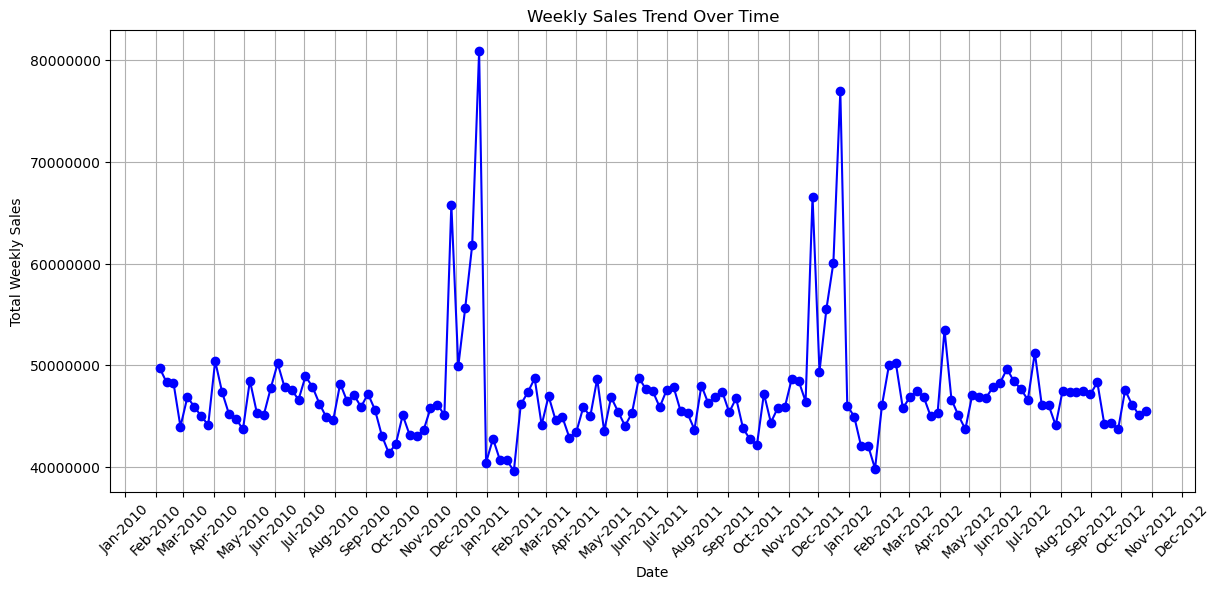

In [102]:
# Group by Date and sum sales to get weekly total sales trend
weekly_sales_trend = train_final.groupby("Date")["Weekly_Sales"].sum()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(weekly_sales_trend.index, weekly_sales_trend.values, marker="o", linestyle="-", color="b")

# Format x-axis to show only Month-Year while keeping all weeks
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.title("Weekly Sales Trend Over Time")

# Formatting X-axis to show Month-Year while keeping all weeks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))  # Format as "Feb-2010"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show labels at month intervals

# Rotate labels for better readability
plt.xticks(rotation=45)

# Ensure y-axis shows full values (no scientific notation)
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)  # Add grid for better readability

plt.show()

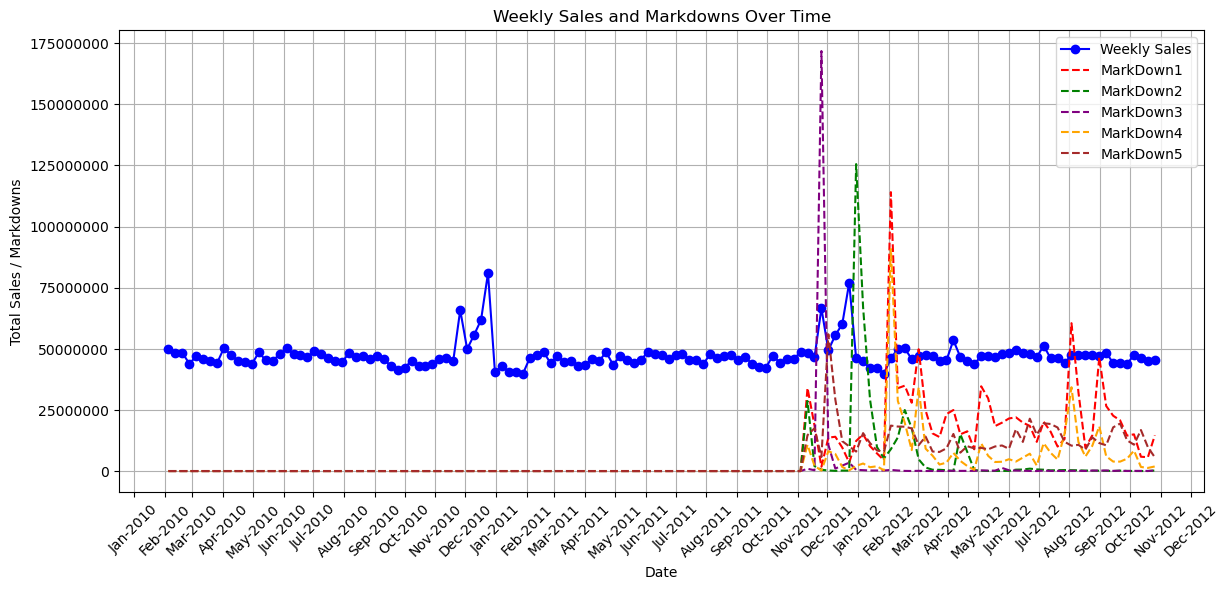

In [103]:
# Group by Date and sum up sales + markdowns
weekly_trend = train_final.groupby("Date").agg({
    "Weekly_Sales": "sum",
    "MarkDown1": "sum",
    "MarkDown2": "sum",
    "MarkDown3": "sum",
    "MarkDown4": "sum",
    "MarkDown5": "sum"
})

# Plot
plt.figure(figsize=(14, 6))

# Plot Weekly Sales
plt.plot(weekly_trend.index, weekly_trend["Weekly_Sales"], marker="o", linestyle="-", color="b", label="Weekly Sales")

# Plot MarkDowns
plt.plot(weekly_trend.index, weekly_trend["MarkDown1"], linestyle="--", color="r", label="MarkDown1")
plt.plot(weekly_trend.index, weekly_trend["MarkDown2"], linestyle="--", color="g", label="MarkDown2")
plt.plot(weekly_trend.index, weekly_trend["MarkDown3"], linestyle="--", color="purple", label="MarkDown3")
plt.plot(weekly_trend.index, weekly_trend["MarkDown4"], linestyle="--", color="orange", label="MarkDown4")
plt.plot(weekly_trend.index, weekly_trend["MarkDown5"], linestyle="--", color="brown", label="MarkDown5")

# Format x-axis to show only Month-Year while keeping all weeks
plt.xlabel("Date")
plt.ylabel("Total Sales / Markdowns")
plt.title("Weekly Sales and Markdowns Over Time")

# Formatting X-axis to show Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate labels for better readability
plt.xticks(rotation=45)

# Ensure y-axis shows full values
plt.ticklabel_format(style='plain', axis='y')

# Add grid and legend
plt.grid(True)
plt.legend()

plt.show()

In [104]:
# Group by Date and sum up sales + markdowns
weekly_trend = train_final.groupby("Date").agg({
    "Weekly_Sales": "sum",
    "MarkDown1": "sum",
    "MarkDown2": "sum",
    "MarkDown3": "sum",
    "MarkDown4": "sum",
    "MarkDown5": "sum"
}).reset_index()

# Create interactive figure
fig = go.Figure()

# Add Weekly Sales line
fig.add_trace(go.Scatter(x=weekly_trend["Date"], y=weekly_trend["Weekly_Sales"], 
                         mode="lines+markers", name="Weekly Sales", line=dict(color="blue")))

# Add MarkDown lines
fig.add_trace(go.Scatter(x=weekly_trend["Date"], y=weekly_trend["MarkDown1"], 
                         mode="lines", name="MarkDown1", line=dict(dash="dash", color="red")))
fig.add_trace(go.Scatter(x=weekly_trend["Date"], y=weekly_trend["MarkDown2"], 
                         mode="lines", name="MarkDown2", line=dict(dash="dash", color="green")))
fig.add_trace(go.Scatter(x=weekly_trend["Date"], y=weekly_trend["MarkDown3"], 
                         mode="lines", name="MarkDown3", line=dict(dash="dash", color="purple")))
fig.add_trace(go.Scatter(x=weekly_trend["Date"], y=weekly_trend["MarkDown4"], 
                         mode="lines", name="MarkDown4", line=dict(dash="dash", color="orange")))
fig.add_trace(go.Scatter(x=weekly_trend["Date"], y=weekly_trend["MarkDown5"], 
                         mode="lines", name="MarkDown5", line=dict(dash="dash", color="brown")))

# Customize layout
fig.update_layout(title="Interactive Weekly Sales and Markdowns Over Time",
                  xaxis_title="Date",
                  yaxis_title="Total Sales / Markdowns",
                  xaxis=dict(tickformat="%b-%Y"),  # Show Month-Year on x-axis
                  hovermode="x unified",
                  template="plotly_white")

# Show interactive plot
fig.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_57168\4106375283.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




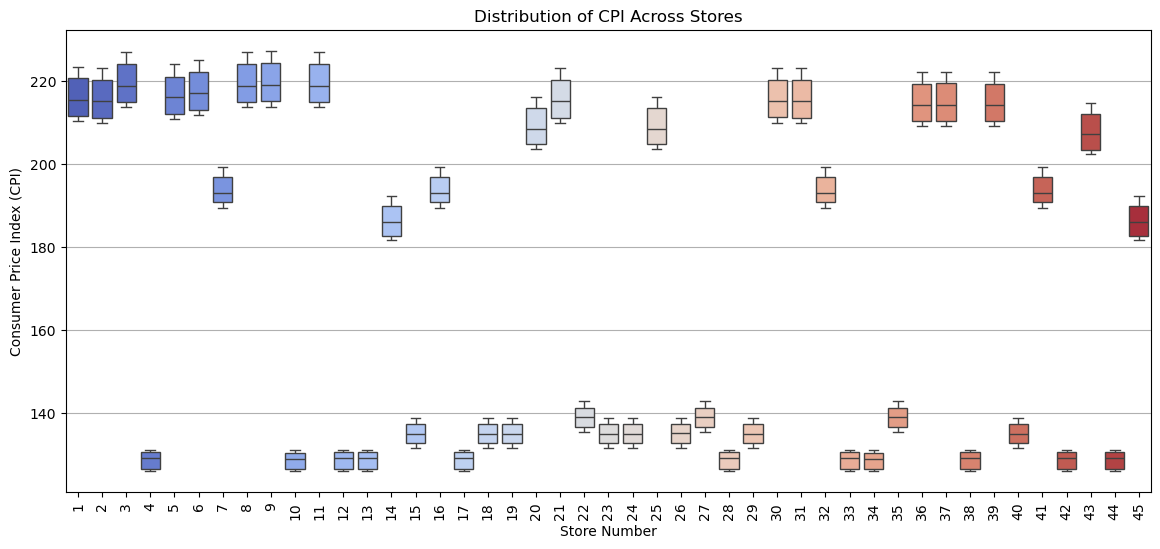

In [105]:
# CPI Across Stores
plt.figure(figsize=(14, 6))
sns.boxplot(data=train_final, x="Store", y="CPI", palette="coolwarm")
plt.xlabel("Store Number")
plt.ylabel("Consumer Price Index (CPI)")
plt.title("Distribution of CPI Across Stores")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_57168\4118532149.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




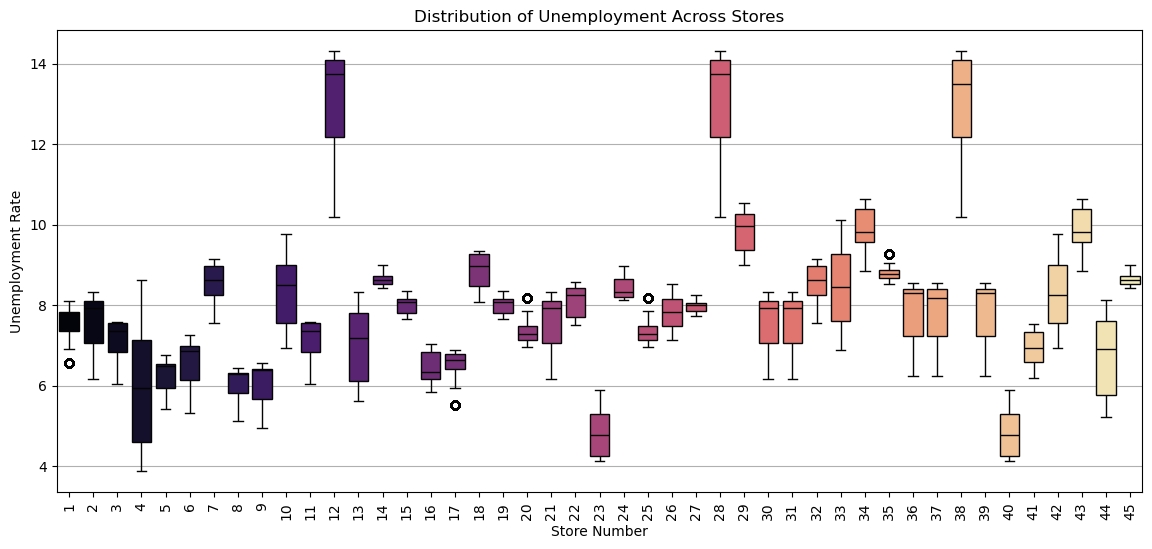

In [106]:
# Unemployment Across Stores
plt.figure(figsize=(14, 6))
sns.boxplot(data=train_final, x="Store", y="Unemployment", palette="magma")
plt.xlabel("Store Number")
plt.ylabel("Unemployment Rate")
plt.title("Distribution of Unemployment Across Stores")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()

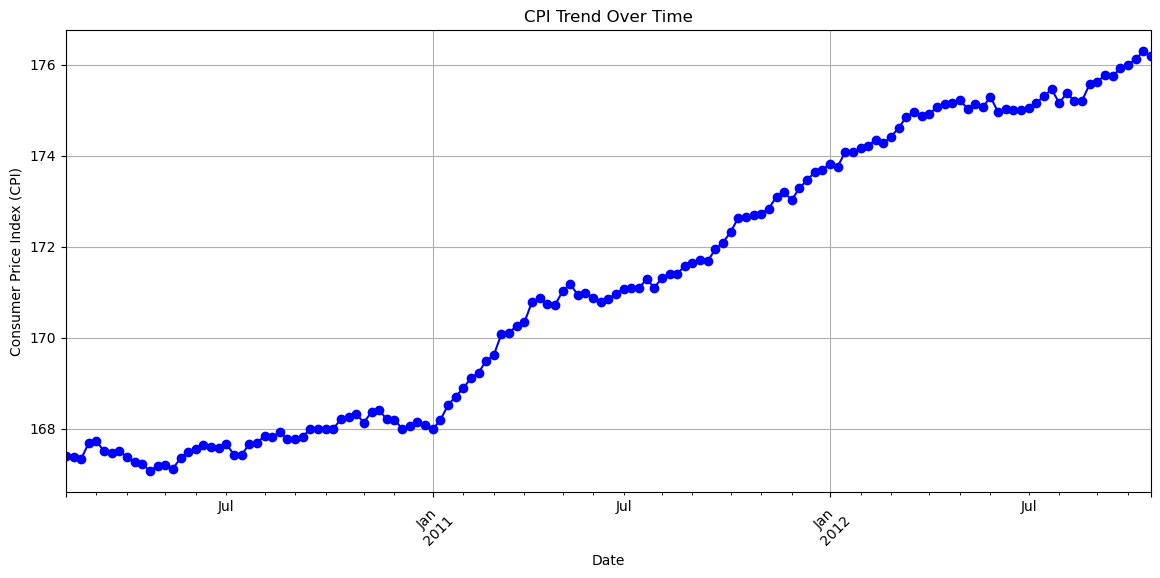

In [107]:
import matplotlib.pyplot as plt

# CPI Trend Over Time
plt.figure(figsize=(14, 6))
train_final.groupby("Date")["CPI"].mean().plot(color="blue", linestyle="-", marker="o")

plt.xlabel("Date")
plt.ylabel("Consumer Price Index (CPI)")
plt.title("CPI Trend Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

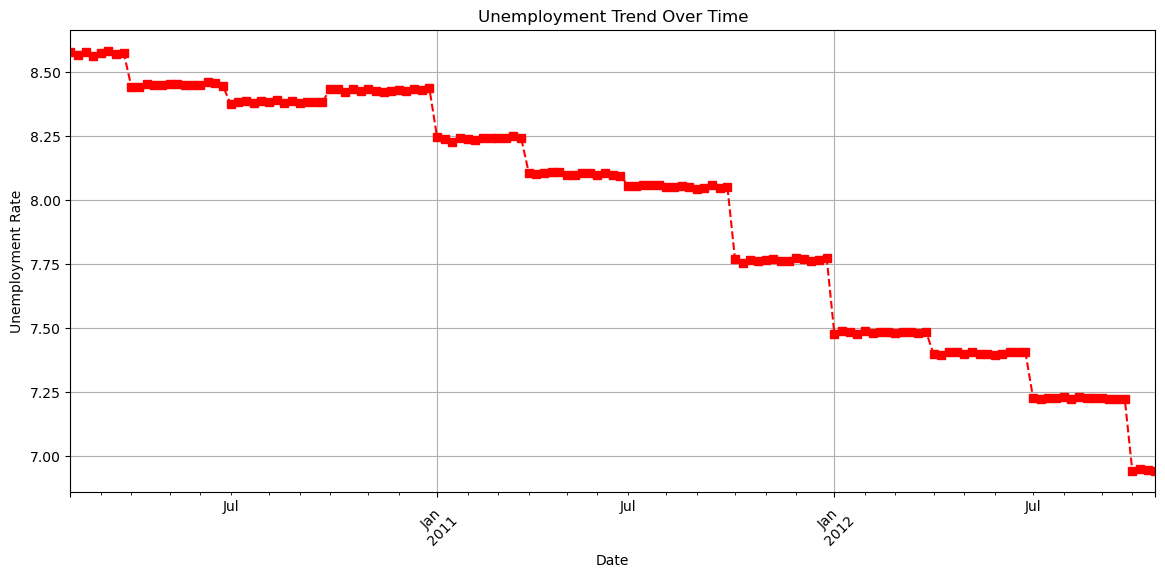

In [108]:
plt.figure(figsize=(14, 6))
train_final.groupby("Date")["Unemployment"].mean().plot(color="red", linestyle="--", marker="s")

plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Trend Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


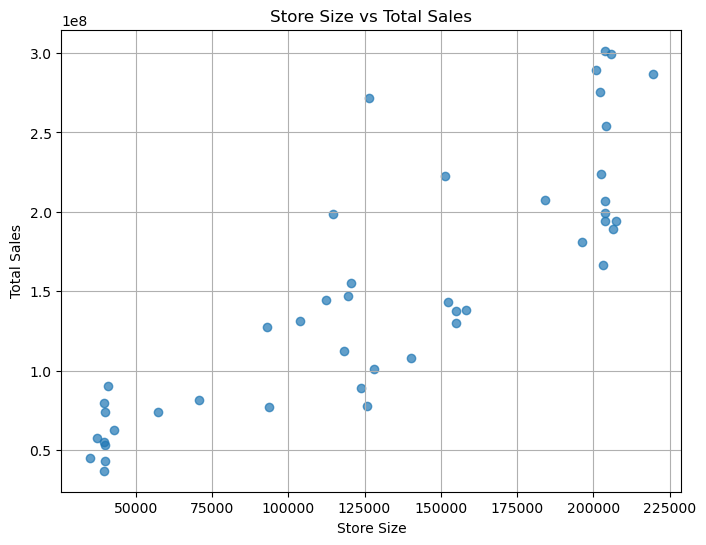

In [109]:
store_sales = train_final.groupby("Store")["Weekly_Sales"].sum()
store_size = train_final.groupby("Store")["Size"].mean()

plt.figure(figsize=(8, 6))
plt.scatter(store_size, store_sales, alpha=0.7)
plt.title("Store Size vs Total Sales")
plt.xlabel("Store Size")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


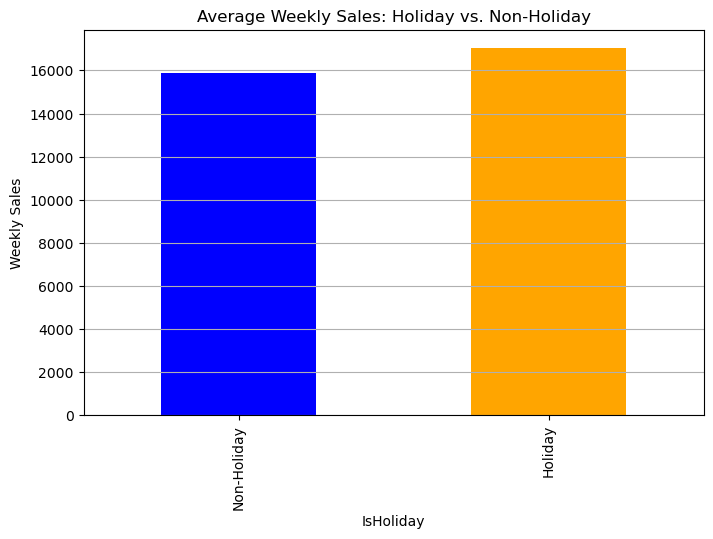

In [110]:
train_final.groupby("IsHoliday")["Weekly_Sales"].mean().plot(kind="bar", figsize=(8, 5), color=["blue", "orange"])
plt.title("Average Weekly Sales: Holiday vs. Non-Holiday")
plt.ylabel("Weekly Sales")
plt.xticks([0, 1], ["Non-Holiday", "Holiday"])
plt.grid(axis="y")
plt.show()


In [111]:
train_final["Year"] = train_final["Date"].dt.year
train_final["Month"] = train_final["Date"].dt.month
# train_final.dtypes

In [112]:
test_final["Year"] = test_final["Date"].dt.year
test_final["Month"] = test_final["Date"].dt.month

### 1.5- Correlation

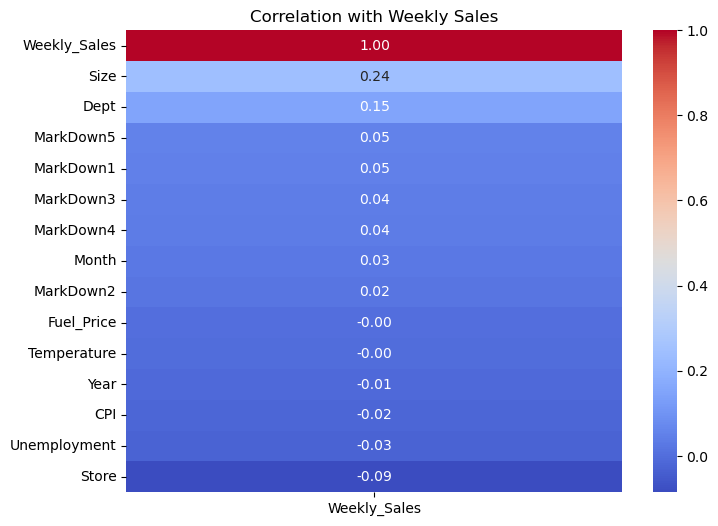

In [113]:
numerical = train_final.select_dtypes(include=['float64', 'int64', 'int32']).columns
# Correlation matrix for numerical features and target
correlation_with_target = train_final[numerical].corr()[["Weekly_Sales"]].sort_values(by="Weekly_Sales", ascending=False)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation with Weekly Sales")
plt.show()

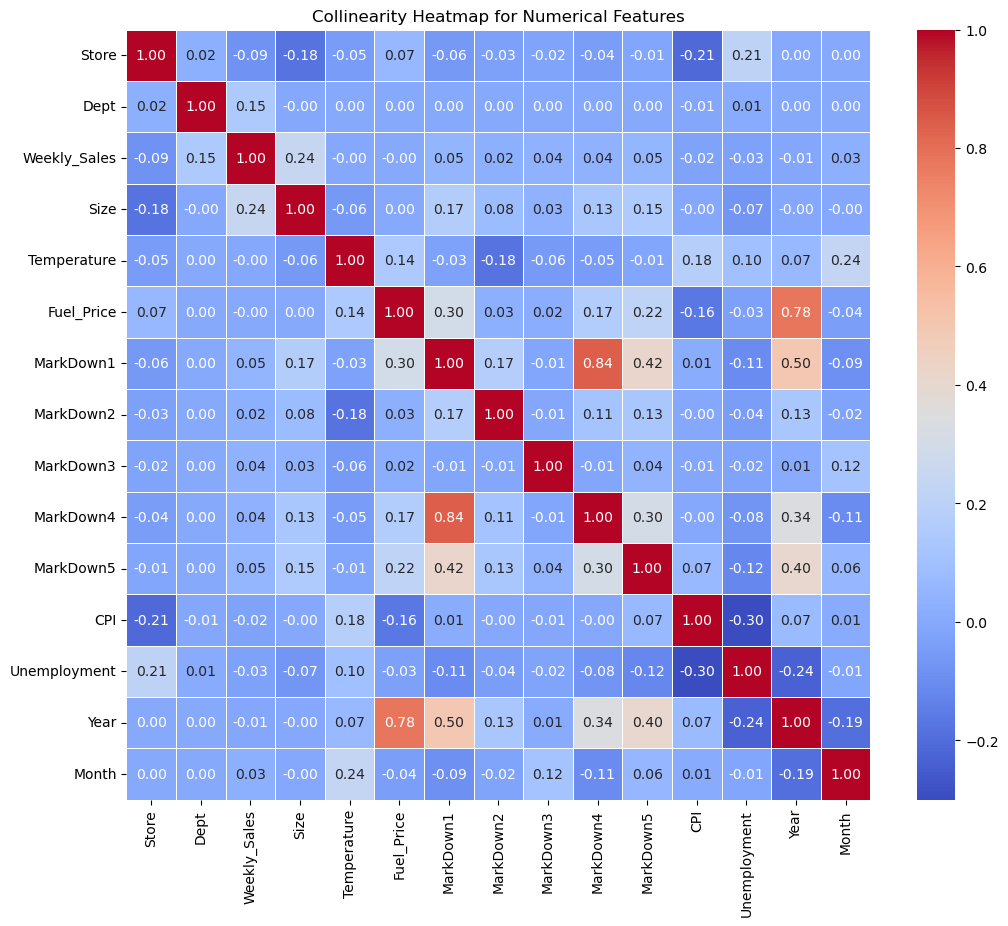

In [114]:
# Compute correlation matrix
collinearity_matrix = train_final[numerical].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(collinearity_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Collinearity Heatmap for Numerical Features")
plt.show()

### 1.6- Handling

In [115]:
# Create a new column for total markdown 
train_final["Total_MarkDown"] = (train_final["MarkDown1"].fillna(0) +
                                 train_final["MarkDown2"].fillna(0) +
                                 train_final["MarkDown3"].fillna(0) +
                                 train_final["MarkDown4"].fillna(0) +
                                 train_final["MarkDown5"].fillna(0)) 

# Drop individual MarkDown columns if you don't need them
train_final.drop(columns=["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"], inplace=True)


In [116]:
test_final["Total_MarkDown"] = (test_final["MarkDown1"].fillna(0) +
                                    test_final["MarkDown2"].fillna(0) +
                                    test_final["MarkDown3"].fillna(0) +
                                    test_final["MarkDown4"].fillna(0) +
                                    test_final["MarkDown5"].fillna(0))

test_final.drop(columns=["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"], inplace=True)

### 1.7- Categorical Correlation

In [117]:
# Point-Biserial Correlation
correlation, p_value = pointbiserialr(train_final["IsHoliday"], train_final["Weekly_Sales"])
print(f"Point-Biserial Correlation: {correlation:.2f}, p-value: {p_value:.4f}")

Point-Biserial Correlation: 0.01, p-value: 0.0000


In [118]:
# Encode Type column (e.g., one-hot encoding or label encoding)
type_encoded = pd.get_dummies(train_final["Type"], drop_first=True)

# Calculate mutual information
mi = mutual_info_regression(type_encoded, train_final["Weekly_Sales"])
print(f"Mutual Information for Type: {mi}")

Mutual Information for Type: [0.02083825 0.04491667]


In [119]:
# Contingency table
contingency_table = pd.crosstab(train_final["Type"], train_final["IsHoliday"])
print("Contingency Table:")
print(contingency_table)


Contingency Table:
IsHoliday   False  True 
Type                    
A          200293  15185
B          151983  11512
C           39633   2964


In [120]:
# Cramér's V Calculation Function
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]  # Chi-squared statistic
    n = confusion_matrix.to_numpy().sum()  # Convert to NumPy and sum total observations
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Compute Cramér's V
cramers_v_value = cramers_v(contingency_table)

# Convert to float and print correctly
print(f"Cramér's V: {float(cramers_v_value):.2f}")

Cramér's V: 0.00


In [121]:
# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p:.4f}")

Chi-Square Statistic: 0.44, p-value: 0.8020


### 1.8- Outliers Checking/ Normalization

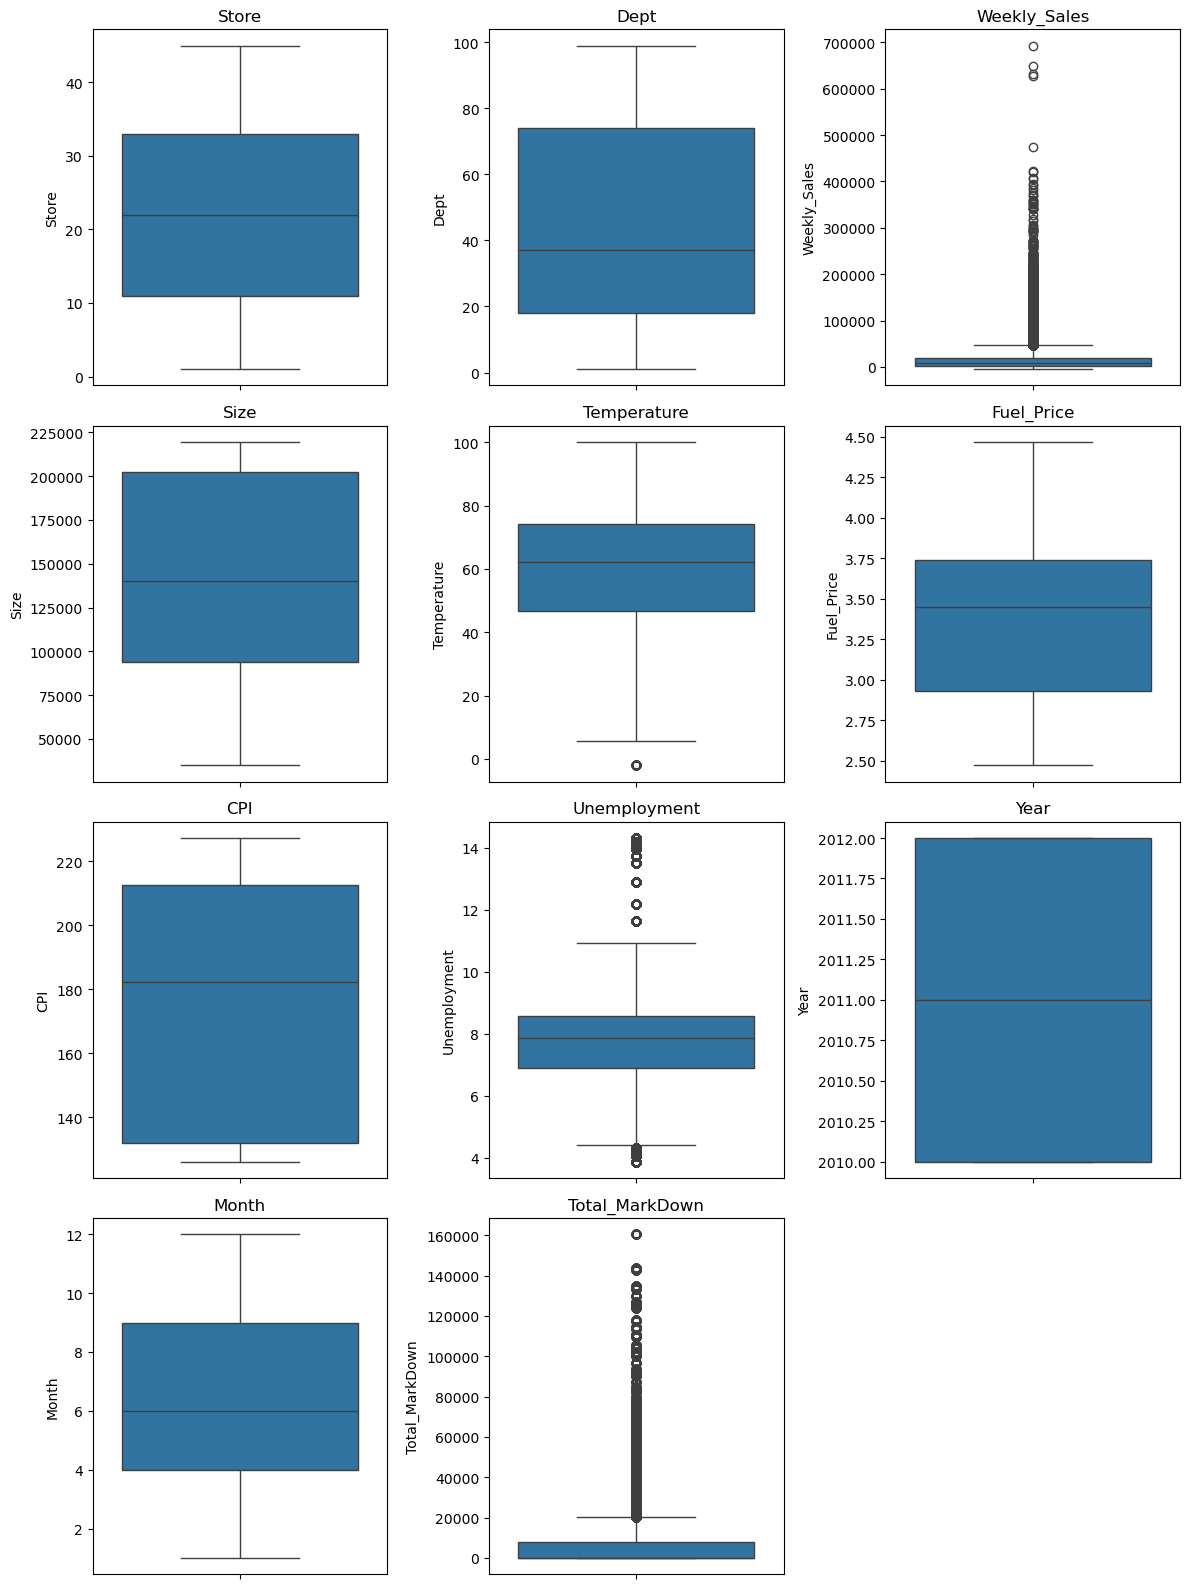

In [122]:
# Select numerical columns for boxplots
numerical = train_final.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Set up dynamic subplots based on the number of numerical features
num_features = len(numerical)
rows = (num_features // 3) + (num_features % 3 > 0)  # Adjust rows based on feature count

plt.figure(figsize=(12, 4 * rows))  # Adjust height dynamically

for i, col in enumerate(numerical, 1):
    plt.subplot(rows, 3, i)  # Dynamically set row count
    sns.boxplot(y=train_final[col])
    plt.title(col)

plt.tight_layout()
plt.show()

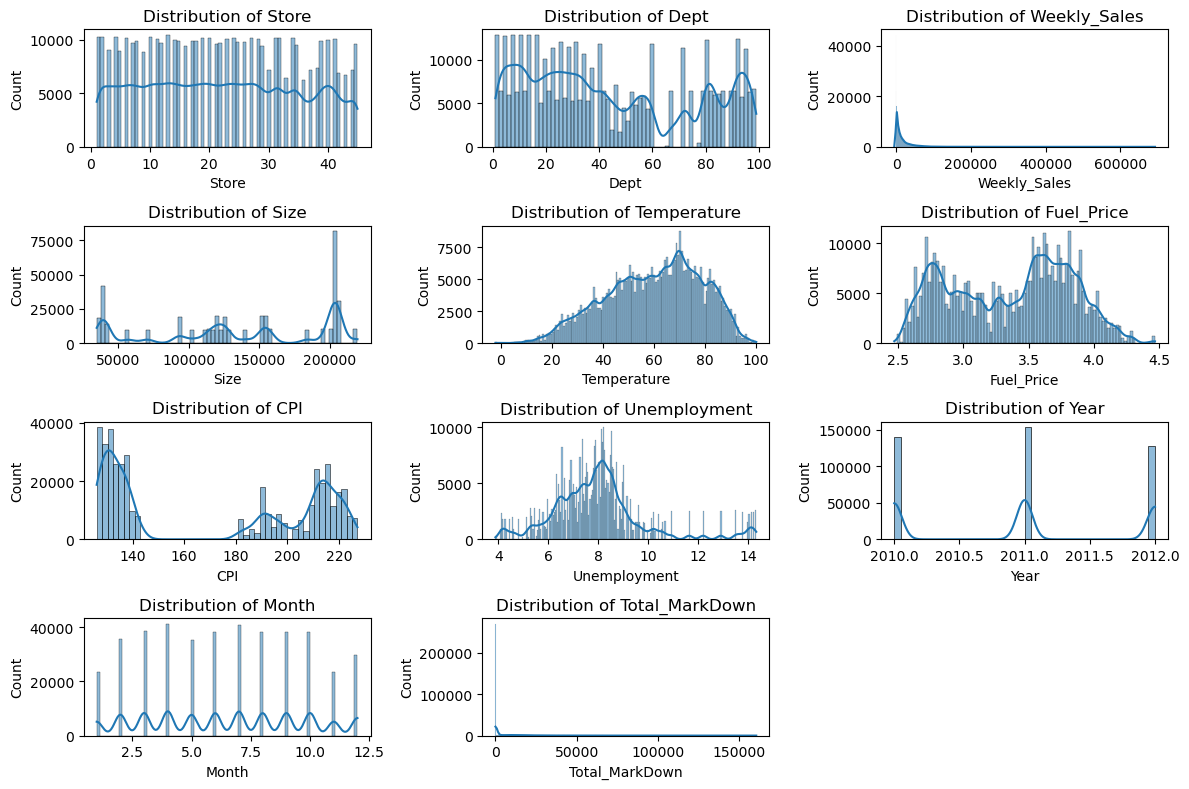

In [123]:
# Plot distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical, 1):
    plt.subplot(4, 3, i)
    sns.histplot(train_final[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [124]:
# Apply sine and cosine transformation for Month
train_final["Month_sin"] = np.sin(2 * np.pi * train_final["Month"] / 12)
train_final["Month_cos"] = np.cos(2 * np.pi * train_final["Month"] / 12)

# Drop the original Month column after transformation
train_final.drop(columns=["Month"], inplace=True)

In [125]:
test_final["Month_sin"] = np.sin(2 * np.pi * test_final["Month"] / 12)
test_final["Month_cos"] = np.cos(2 * np.pi * test_final["Month"] / 12)
test_final.drop(columns=["Month"], inplace=True)

In [ ]:
# Ensure Date is in datetime format
train_final["Date"] = pd.to_datetime(train_final["Date"])

# Convert Year to Days Since Start
train_final["Days_Since_Start"] = (train_final["Date"] - train_final["Date"].min()).dt.days

# Drop the original Year column
train_final.drop(columns=["Year"], inplace=True)

In [127]:
test_final["Date"] = pd.to_datetime(test_final["Date"])
test_final["Days_Since_Start"] = (test_final["Date"] - test_final["Date"].min()).dt.days
test_final.drop(columns=["Year"], inplace=True)

In [128]:
# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Features to scale
columns_minmax = ["Size", "Fuel_Price"]  # MinMaxScaler for small-range features
columns_standard = ["Temperature", "CPI"]  # StandardScaler for normally distributed features
columns_robust = ["Unemployment", "Total_MarkDown"]  # RobustScaler for outlier-heavy features

# Apply scalers
train_final[columns_minmax] = minmax_scaler.fit_transform(train_final[columns_minmax])
train_final[columns_standard] = standard_scaler.fit_transform(train_final[columns_standard])
train_final[columns_robust] = robust_scaler.fit_transform(train_final[columns_robust])

# Verify the transformations
train_final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Month_sin,Month_cos,Days_Since_Start
0,1,1,2010-02-05,24924.50,False,A,0.630267,-0.963798,0.050100,1.018774,0.142772,0.0,0.866025,5.000000e-01,0
1,1,1,2010-02-12,46039.49,True,A,0.630267,-1.169783,0.038076,1.022498,0.142772,0.0,0.866025,5.000000e-01,7
2,1,1,2010-02-19,41595.55,False,A,0.630267,-1.092810,0.021042,1.023697,0.142772,0.0,0.866025,5.000000e-01,14
3,1,1,2010-02-26,19403.54,False,A,0.630267,-0.729625,0.044589,1.024476,0.142772,0.0,0.866025,5.000000e-01,21
4,1,1,2010-03-05,21827.90,False,A,0.630267,-0.736672,0.076653,1.025255,0.142772,0.0,1.000000,6.123234e-17,28


In [129]:
test_final[columns_minmax] = minmax_scaler.transform(test_final[columns_minmax])
test_final[columns_standard] = standard_scaler.transform(test_final[columns_standard])
test_final[columns_robust] = robust_scaler.transform(test_final[columns_robust])
test_final.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Month_sin,Month_cos,Days_Since_Start
0,1,1,2012-11-02,False,A,0.630267,-0.258569,0.457916,1.334573,-0.769185,2.271417,-0.5,0.866025,0
1,1,1,2012-11-09,False,A,0.630267,0.062335,0.421844,1.335046,-0.769185,3.174318,-0.5,0.866025,7
2,1,1,2012-11-16,False,A,0.630267,-0.388665,0.390782,1.335853,-0.769185,2.208969,-0.5,0.866025,14
3,1,1,2012-11-23,True,A,0.630267,-0.209241,0.370240,1.337105,-0.769185,9.450013,-0.5,0.866025,21
4,1,1,2012-11-30,False,A,0.630267,-0.420105,0.368236,1.338357,-0.769185,1.661283,-0.5,0.866025,28


In [130]:
train_final.drop(columns=["Date"], inplace=True)

In [131]:
test_final.drop(columns=["Date"], inplace=True)

In [132]:
train_final['Type'].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

In [133]:
train_final = pd.get_dummies(train_final, columns=["Type"], drop_first=True)

# Verify Encoding
display(train_final.head())

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Month_sin,Month_cos,Days_Since_Start,Type_B,Type_C
0,1,1,24924.50,False,0.630267,-0.963798,0.050100,1.018774,0.142772,0.0,0.866025,5.000000e-01,0,False,False
1,1,1,46039.49,True,0.630267,-1.169783,0.038076,1.022498,0.142772,0.0,0.866025,5.000000e-01,7,False,False
2,1,1,41595.55,False,0.630267,-1.092810,0.021042,1.023697,0.142772,0.0,0.866025,5.000000e-01,14,False,False
3,1,1,19403.54,False,0.630267,-0.729625,0.044589,1.024476,0.142772,0.0,0.866025,5.000000e-01,21,False,False
4,1,1,21827.90,False,0.630267,-0.736672,0.076653,1.025255,0.142772,0.0,1.000000,6.123234e-17,28,False,False


In [134]:
test_final = pd.get_dummies(test_final, columns=["Type"], drop_first=True)

In [135]:
train_final["IsHoliday"] = train_final["IsHoliday"].astype(int)

# Verify Transformation
display(train_final["IsHoliday"].value_counts())

IsHoliday
0    391909
1     29661
Name: count, dtype: int64

### 1.9- Splitting/ Training

In [136]:
# Ensure all negative sales are set to zero
train_final["Weekly_Sales"] = train_final["Weekly_Sales"].apply(lambda x: max(x, 0))

# Define Features (X) and Target (y)
X = train_final.drop(columns=["Weekly_Sales"])  # Drop target variable
y = train_final["Weekly_Sales"]  # Target variable

# Set a fixed random seed for reproducibility
RANDOM_SEED = 42  

# Split the dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Print Shapes to Verify
print(f"Train Set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test Set: X_test={X_test.shape}, y_test={y_test.shape}")

Train Set: X_train=(337256, 14), y_train=(337256,)
Test Set: X_test=(84314, 14), y_test=(84314,)


#### - Linear Models

In [137]:
# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # Train Model
    y_pred = model.predict(X_test)  # Make Predictions
    
    # Calculate Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {"MAE": mae, "MSE": mse, "R2": r2}

# Dictionary to store results
linear_model_results = {}

# 1️⃣ Simple Linear Regression (Baseline)
linear_reg = LinearRegression()
linear_model_results["Linear Regression"] = evaluate_model(linear_reg, X_train, X_test, y_train, y_test)

# 2️⃣ Ridge Regression (L2 Regularization)
ridge_reg = Ridge(alpha=1.0)  # Alpha controls regularization strength
linear_model_results["Ridge Regression"] = evaluate_model(ridge_reg, X_train, X_test, y_train, y_test)

# 3️⃣ Lasso Regression (L1 Regularization)
lasso_reg = Lasso(alpha=0.01)  # Alpha controls regularization strength
linear_model_results["Lasso Regression"] = evaluate_model(lasso_reg, X_train, X_test, y_train, y_test)

# 4️⃣ ElasticNet Regression (L1 + L2 Regularization)
elasticnet_reg = ElasticNet(alpha=0.01, l1_ratio=0.5)  # l1_ratio balances L1 and L2
linear_model_results["ElasticNet Regression"] = evaluate_model(elasticnet_reg, X_train, X_test, y_train, y_test)

# Display Results
linear_results_df = pd.DataFrame(linear_model_results).T
display(linear_results_df)


,MAE,MSE,R2
Linear Regression,14562.868983,4.733958e+08,0.092176
Ridge Regression,14562.861940,4.733958e+08,0.092176
Lasso Regression,14562.865427,4.733958e+08,0.092176
ElasticNet Regression,14563.665584,4.736675e+08,0.091655


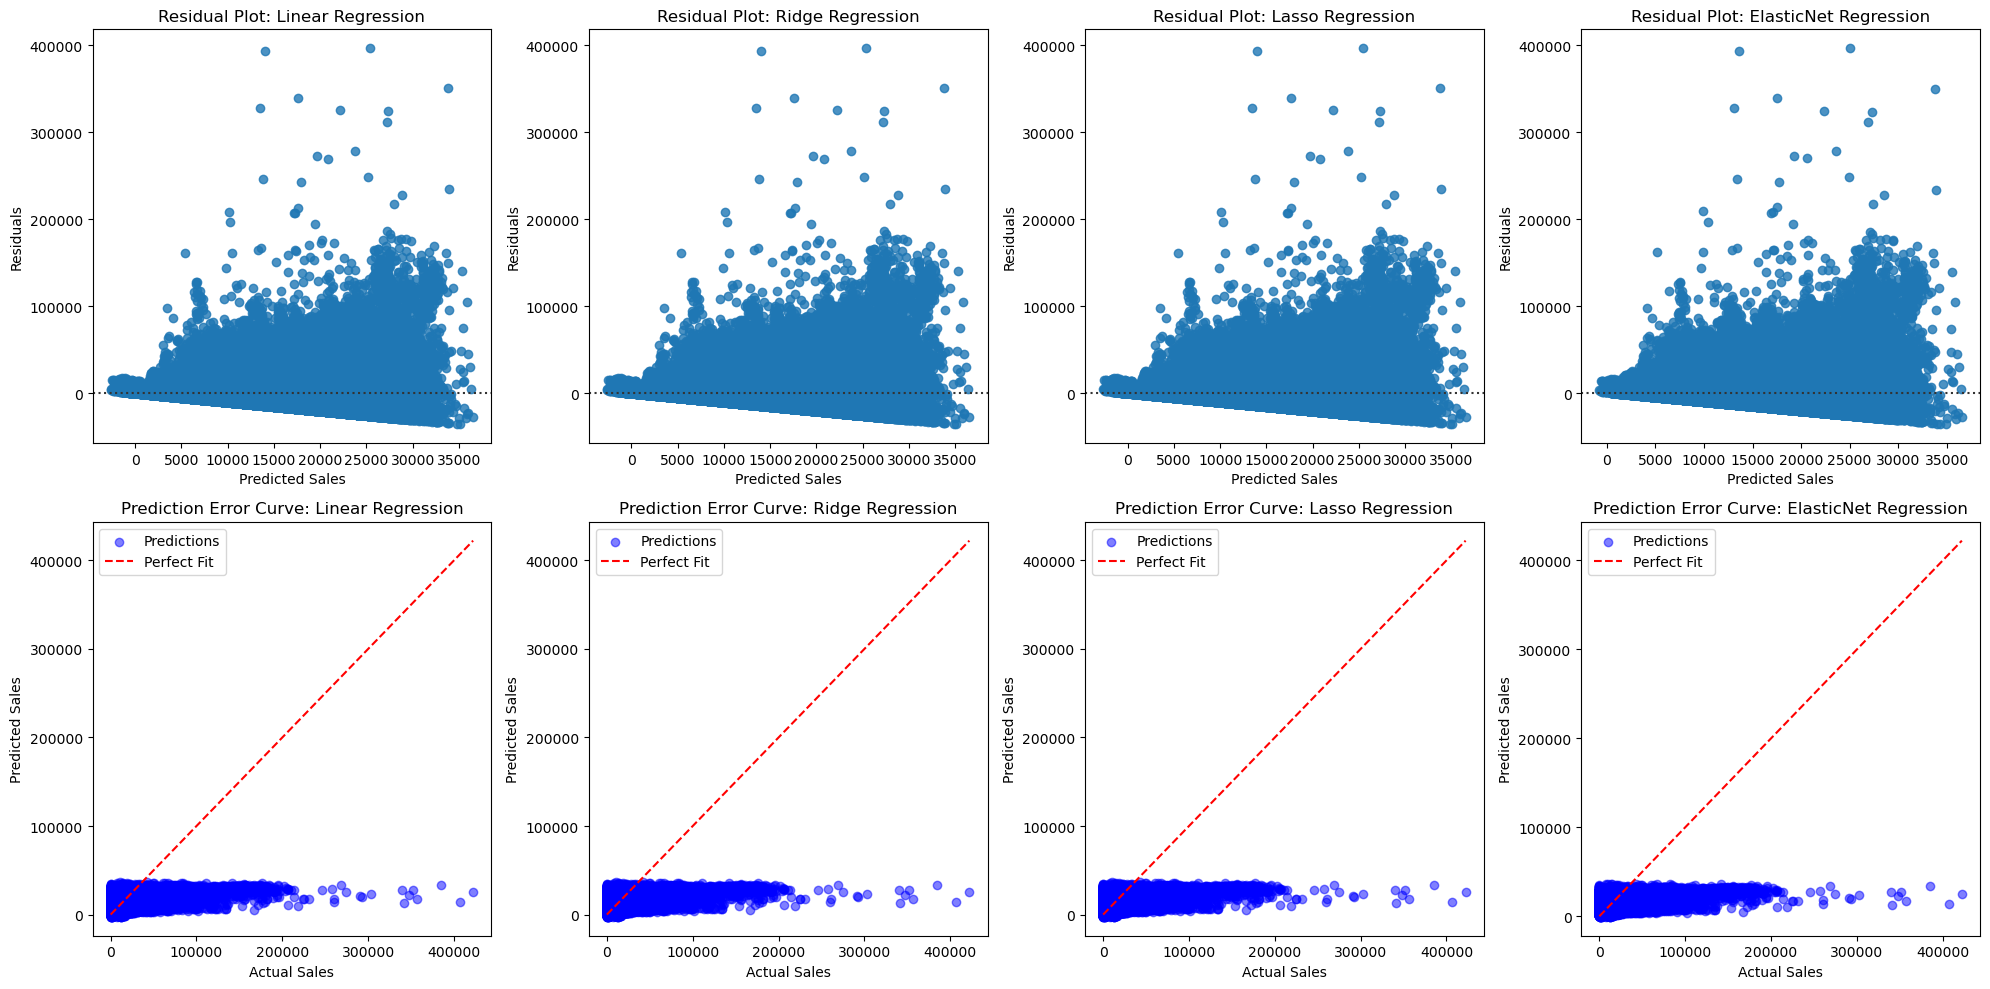

In [138]:
# Define models to evaluate
models = {
    "Linear Regression": linear_reg,
    "Ridge Regression": ridge_reg,
    "Lasso Regression": lasso_reg,
    "ElasticNet Regression": elasticnet_reg
}

# Sample random points for faster plotting
sample_size = min(5000000, len(y_test))  
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
y_test_sampled = y_test.iloc[sample_indices]

# Create subplots (2 rows, 4 columns: Residual + Prediction Error for each model)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Iterate through models and generate plots
for i, (name, model) in enumerate(models.items()):
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_sampled = y_pred[sample_indices]

    # 1️⃣ Residual Plot
    sns.residplot(x=y_pred_sampled, y=y_test_sampled, line_kws={"color": "red"}, ax=axes[0, i])
    axes[0, i].set_title(f"Residual Plot: {name}")
    axes[0, i].set_xlabel("Predicted Sales")
    axes[0, i].set_ylabel("Residuals")

    # 2️⃣ Prediction Error Curve
    axes[1, i].scatter(y_test_sampled, y_pred_sampled, alpha=0.5, color="blue", label="Predictions")
    axes[1, i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", label="Perfect Fit")  
    axes[1, i].set_title(f"Prediction Error Curve: {name}")
    axes[1, i].set_xlabel("Actual Sales")
    axes[1, i].set_ylabel("Predicted Sales")
    axes[1, i].legend()

plt.tight_layout()
plt.show()


#### - Distance Based Learning

In [139]:
# # Define values of K and distance metrics to test
# k_values = [3, 4, 5, 7, 10, 15]  # Different neighbor values
# distance_metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']  # Distance formulas

# # Store results
# knn_results_list = []

# # Loop through different K values & distance metrics
# for k in k_values:
#     for metric in distance_metrics:
#         # Define KNN model
#         knn_model = KNeighborsRegressor(n_neighbors=k, metric=metric)
        
#         # Train the model
#         knn_model.fit(X_train, y_train)
        
#         # Predict on test data
#         y_pred_knn = knn_model.predict(X_test)
        
#         # Evaluate model performance
#         knn_results_list.append({
#             "K": k,
#             "Distance Metric": metric,
#             "MAE": mean_absolute_error(y_test, y_pred_knn),
#             "MSE": mean_squared_error(y_test, y_pred_knn),
#             "RMSE": root_mean_squared_error(y_test, y_pred_knn),  # ✅ Correct function
#             "R2": r2_score(y_test, y_pred_knn)
#         })

# # Convert results to DataFrame
# knn_results_df = pd.DataFrame(knn_results_list)
# display(knn_results_df)

In [140]:
# Train KNN with best parameters
best_knn = KNeighborsRegressor(n_neighbors=10, metric='manhattan')
best_knn.fit(X_train, y_train)

# Make predictions
y_pred_best_knn = best_knn.predict(X_test)

# Evaluate Performance
knn_best_results = {
    "MAE": mean_absolute_error(y_test, y_pred_best_knn),
    "MSE": mean_squared_error(y_test, y_pred_best_knn),
    "RMSE": root_mean_squared_error(y_test, y_pred_best_knn),
    "R2": r2_score(y_test, y_pred_best_knn)
}
knn_best_results_df = pd.DataFrame(knn_best_results, index=["KNN (K=10, Manhattan)"])
display(knn_best_results_df)

,MAE,MSE,RMSE,R2
"KNN (K=10, Manhattan)",10547.900134,2.913681e+08,17069.50919,0.441248


In [141]:
# # Filter only Manhattan Distance results
# knn_manhattan_results = knn_results_df[knn_results_df["Distance Metric"] == "manhattan"]

# # Plot RMSE vs K values
# plt.figure(figsize=(10,5))
# sns.lineplot(x=knn_manhattan_results["K"], y=knn_manhattan_results["RMSE"], marker="o", label="RMSE")
# plt.xlabel("Number of Neighbors (K)")
# plt.ylabel("Root Mean Squared Error (RMSE)")
# plt.title("KNN Performance: RMSE vs K (Manhattan Distance)")
# plt.legend()
# plt.show()

# # Plot R2 Score vs K values
# plt.figure(figsize=(10,5))
# sns.lineplot(x=knn_manhattan_results["K"], y=knn_manhattan_results["R2"], marker="o", color="red", label="R2 Score")
# plt.xlabel("Number of Neighbors (K)")
# plt.ylabel("R² Score")
# plt.title("KNN Performance: R² Score vs K (Manhattan Distance)")
# plt.legend()
# plt.show()

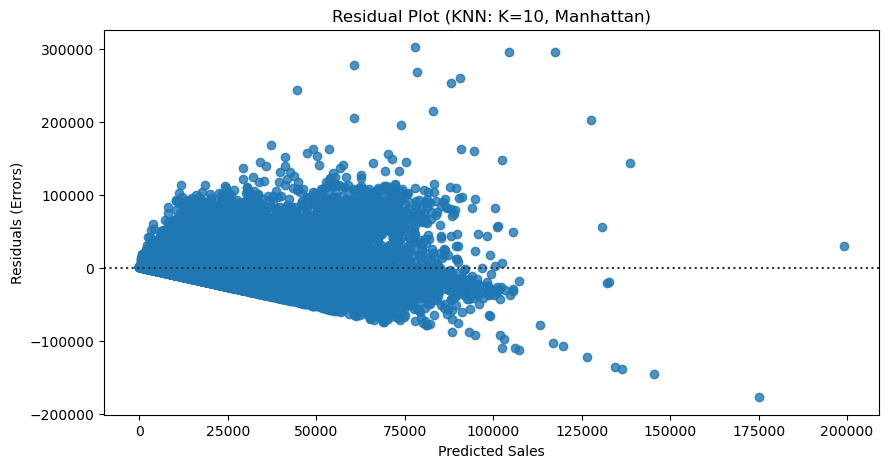

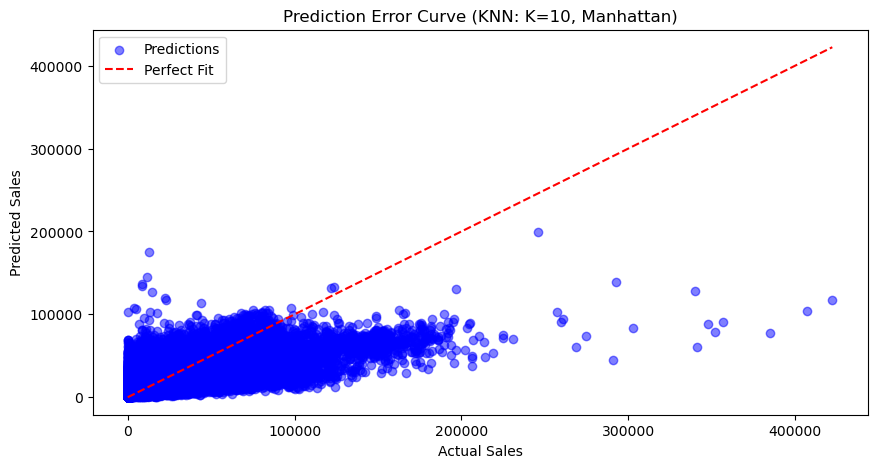

In [142]:
# Sample 5000 random points for faster visualization
sample_size = min(500000, len(y_test))  
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
y_test_sampled = y_test.iloc[sample_indices]
y_pred_knn_sampled = y_pred_best_knn[sample_indices]

# 1️⃣ Residual Plot for KNN
plt.figure(figsize=(10,5))
sns.residplot(x=y_pred_knn_sampled, y=y_test_sampled, line_kws={"color": "red"})
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot (KNN: K=10, Manhattan)")
plt.show()

# 2️⃣ Prediction Error Curve for KNN
plt.figure(figsize=(10,5))
plt.scatter(y_test_sampled, y_pred_knn_sampled, alpha=0.5, color="blue", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", label="Perfect Fit")  # Diagonal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Prediction Error Curve (KNN: K=10, Manhattan)")
plt.legend()
plt.show()

In [143]:
# # Define values to test
# C_values = [1, 10, 100]
# epsilon_values = [100, 1000, 5000]
# kernel_types = ["linear", "rbf", "poly", 'sigmoid']

# # Store results
# svr_results_list = []

# # Loop through different SVR parameter combinations
# for C in C_values:
#     for epsilon in epsilon_values:
#         for kernel in kernel_types:
#             # Define SVR model
#             svr_model = SVR(kernel=kernel, C=C, epsilon=epsilon)
            
#             # Train the model
#             svr_model.fit(X_train, y_train)
            
#             # Make Predictions
#             y_pred_svr = svr_model.predict(X_test)
            
#             # Evaluate model performance
#             svr_results_list.append({
#                 "C": C,
#                 "Epsilon": epsilon,
#                 "Kernel": kernel,
#                 "MAE": mean_absolute_error(y_test, y_pred_svr),
#                 "MSE": mean_squared_error(y_test, y_pred_svr),
#                 "RMSE": root_mean_squared_error(y_test, y_pred_svr),
#                 "R2": r2_score(y_test, y_pred_svr)
#             })

# # Convert results to DataFrame
# svr_results_df = pd.DataFrame(svr_results_list)
# display(svr_results_df)

In [144]:
# from sklearn.svm import SVR
# import pandas as pd

# # Best SVR Model
# best_svr = SVR(kernel='rbf', C=100, epsilon=1000)

# # Train Model
# best_svr.fit(X_train, y_train)

# # Predict on Test Data
# y_pred_best_svr = best_svr.predict(X_test)

# # Evaluate Performance
# svr_best_results = {
#     "MAE": mean_absolute_error(y_test, y_pred_best_svr),
#     "MSE": mean_squared_error(y_test, y_pred_best_svr),
#     "RMSE": root_mean_squared_error(y_test, y_pred_best_svr),
#     "R2": r2_score(y_test, y_pred_best_svr)
# }

# # Display Results
# svr_best_results_df = pd.DataFrame(svr_best_results, index=["SVR (C=100, Epsilon=1000, RBF)"])
# print(svr_best_results_df)

In [145]:
# display(svr_best_results_df)

In [146]:
# # Sample 5000 random points for better visualization
# sample_size = min(5000000, len(y_test))  
# sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
# y_test_sampled = y_test.iloc[sample_indices]
# y_pred_svr_sampled = y_pred_best_svr[sample_indices]

# # 1️⃣ Residual Plot for SVR
# plt.figure(figsize=(10,5))
# sns.residplot(x=y_pred_svr_sampled, y=y_test_sampled, line_kws={"color": "red"})
# plt.xlabel("Predicted Sales")
# plt.ylabel("Residuals (Errors)")
# plt.title("Residual Plot (SVR: C=100, Epsilon=1000, RBF)")
# plt.show()

# # 2️⃣ Prediction Error Curve for SVR
# plt.figure(figsize=(10,5))
# plt.scatter(y_test_sampled, y_pred_svr_sampled, alpha=0.5, color="blue", label="Predictions")
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", label="Perfect Fit")  # Diagonal line
# plt.xlabel("Actual Sales")
# plt.ylabel("Predicted Sales")
# plt.title("Prediction Error Curve (SVR: C=100, Epsilon=1000, RBF)")
# plt.legend()
# plt.show()

#### - Tree Based Models

In [147]:
# Train a baseline Decision Tree
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=None, min_samples_leaf=5, min_samples_split=2)
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate performance
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print results
print(f"Decision Tree (Baseline):\nMAE: {mae_dt}\nMSE: {mse_dt}\nRMSE: {rmse_dt}\nR²: {r2_dt}")

Decision Tree (Baseline):
MAE: 1854.6271668830725
MSE: 24674060.439003088
RMSE: 4967.29910907357
R²: 0.95268293846783


In [148]:
# # Define hyperparameters to tune
# param_grid = {
#     "max_depth": [5, 10, 15, 20, None],
#     "min_samples_split": [2, 10, 20, 50],
#     "min_samples_leaf": [1, 5, 10, 20]
# }

# # Perform Grid Search
# grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, 
#                               cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
# grid_search_dt.fit(X_train, y_train)

# # Best parameters
# best_params_dt = grid_search_dt.best_params_
# print("Best Parameters for Decision Tree:", best_params_dt)

# # Train with best parameters
# best_dt = DecisionTreeRegressor(**best_params_dt, random_state=42)
# best_dt.fit(X_train, y_train)

# # Predictions & Evaluation
# y_pred_best_dt = best_dt.predict(X_test)
# mae_best_dt = mean_absolute_error(y_test, y_pred_best_dt)
# mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
# rmse_best_dt = np.sqrt(mse_best_dt)
# r2_best_dt = r2_score(y_test, y_pred_best_dt)

# # Print best results
# print(f"Decision Tree (Tuned):\nMAE: {mae_best_dt}\nMSE: {mse_best_dt}\nRMSE: {rmse_best_dt}\nR²: {r2_best_dt}")


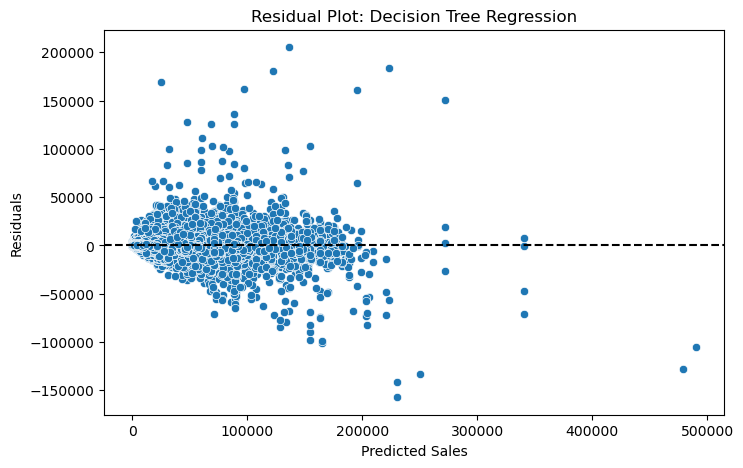

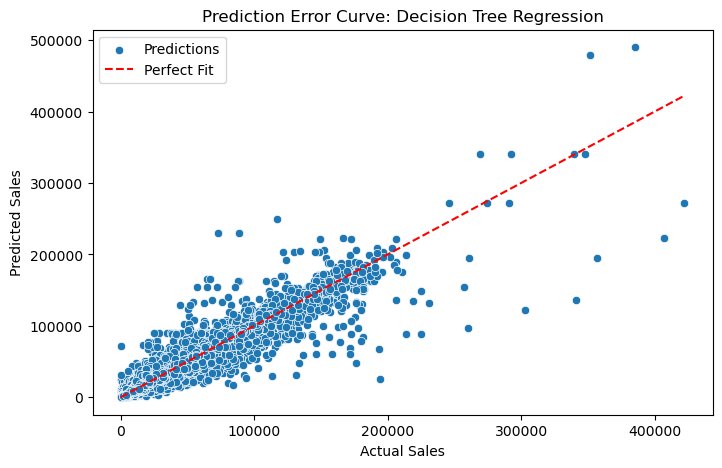

In [149]:
# Residual Plot
residuals_dt = y_test - y_pred_dt
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_dt, y=residuals_dt)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.title("Residual Plot: Decision Tree Regression")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.show()

# Prediction Error Curve 
plt.figure(figsize=(8,5)) 
sns.scatterplot(x=y_test, y=y_pred_dt, label="Predictions") 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit") 
plt.xlabel("Actual Sales") 
plt.ylabel("Predicted Sales") 
plt.legend() 
plt.title("Prediction Error Curve: Decision Tree Regression") 
plt.show() 

In [150]:
# Train a baseline Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, max_depth=20, max_features=None)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate performance 
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest (Baseline):\nMAE: {mae_rf}\nMSE: {mse_rf}\nRMSE: {rmse_rf}\nR²: {r2_rf}")

Random Forest (Baseline):
MAE: 1618.930010837054
MSE: 17217812.96812899
RMSE: 4149.43525893934
R²: 0.9669816681499841


In [151]:
# # Define parameter grid
# param_grid_rf = {
#     "n_estimators": [100, 300, 500],
#     "max_depth": [10, 20, None],
#     "min_samples_split": [2, 10, 20],
#     "max_features": ["sqrt", "log2", None]
# }

# # Perform Randomized Search (faster than GridSearch)
# random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), 
#                                       param_distributions=param_grid_rf, 
#                                       n_iter=10, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
# random_search_rf.fit(X_train, y_train)

# # Best parameters
# best_params_rf = random_search_rf.best_params_
# print("Best Parameters for Random Forest:", best_params_rf)

# # Train best model
# best_rf = RandomForestRegressor(**best_params_rf, random_state=42, n_jobs=-1)
# best_rf.fit(X_train, y_train)

# # Predictions & Evaluation
# y_pred_best_rf = best_rf.predict(X_test)
# mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
# mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
# rmse_best_rf = np.sqrt(mse_best_rf)
# r2_best_rf = r2_score(y_test, y_pred_best_rf)

# # Print best results
# print(f"Random Forest (Tuned):\nMAE: {mae_best_rf}\nMSE: {mse_best_rf}\nRMSE: {rmse_best_rf}\nR²: {r2_best_rf}")

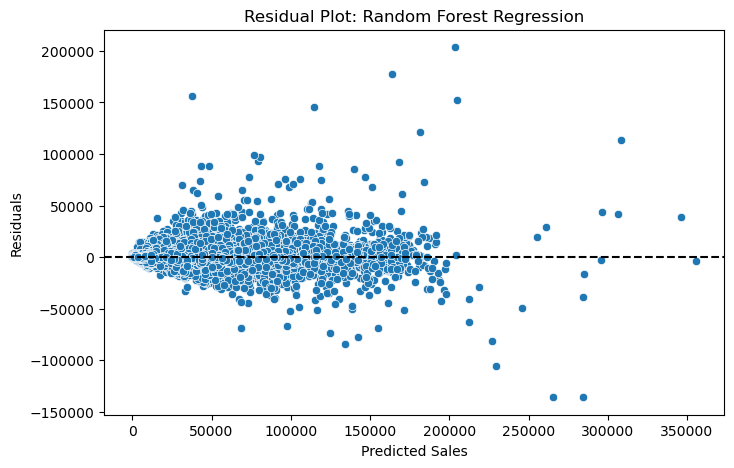

In [152]:
# Residual Plot
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.title("Residual Plot: Random Forest Regression")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.show()

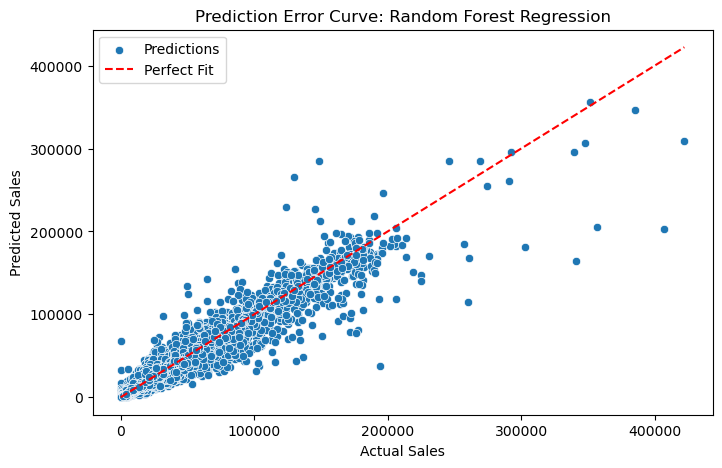

In [153]:
# Prediction Error Curve
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.title("Prediction Error Curve: Random Forest Regression")
plt.show()

In [154]:
# Train a baseline XGBoost model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_regressor.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"XGBoost (Baseline):\nMAE: {mae_xgb}\nMSE: {mse_xgb}\nRMSE: {rmse_xgb}\nR²: {r2_xgb}")

XGBoost (Baseline):
MAE: 3063.624026470607
MSE: 31271847.888585202
RMSE: 5592.123736880757
R²: 0.940030464202404


In [155]:
# Define hyperparameter grid
param_grid_xgb = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 6, 10],
    "subsample": [0.6, 0.8, 1.0]
}

# Perform Randomized Search
random_search_xgb = RandomizedSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1), 
    param_distributions=param_grid_xgb, 
    n_iter=10, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

random_search_xgb.fit(X_train, y_train)

# Best parameters
best_params_xgb = random_search_xgb.best_params_
print("Best Parameters for XGBoost:", best_params_xgb)

# Train best model
best_xgb = xgb.XGBRegressor(**best_params_xgb, objective='reg:squarederror', random_state=42, n_jobs=-1)
best_xgb.fit(X_train, y_train)

# Predictions & Evaluation
y_pred_best_xgb = best_xgb.predict(X_test)
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print best results
print(f"XGBoost (Tuned):\nMAE: {mae_best_xgb}\nMSE: {mse_best_xgb}\nRMSE: {rmse_best_xgb}\nR²: {r2_best_xgb}")

Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01}
XGBoost (Tuned):
MAE: 2444.7870364400105
MSE: 22710085.553784832
RMSE: 4765.509999337409
R²: 0.956449222526396


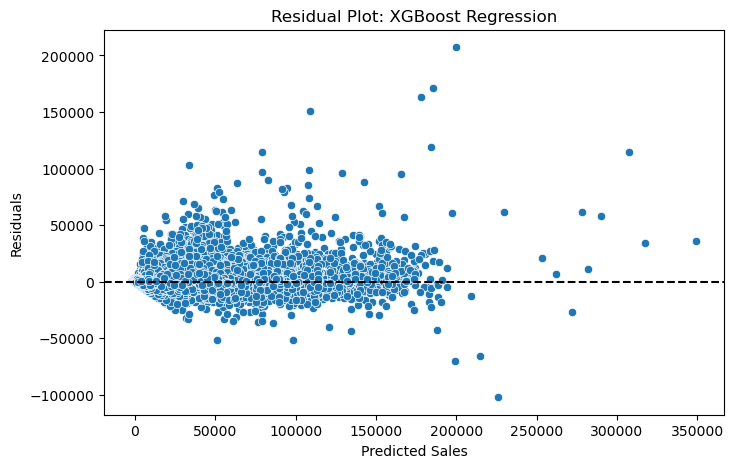

In [156]:
# Residual Plot
residuals_xgb = y_test - y_pred_best_xgb
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_best_xgb, y=residuals_xgb)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.title("Residual Plot: XGBoost Regression")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.show()

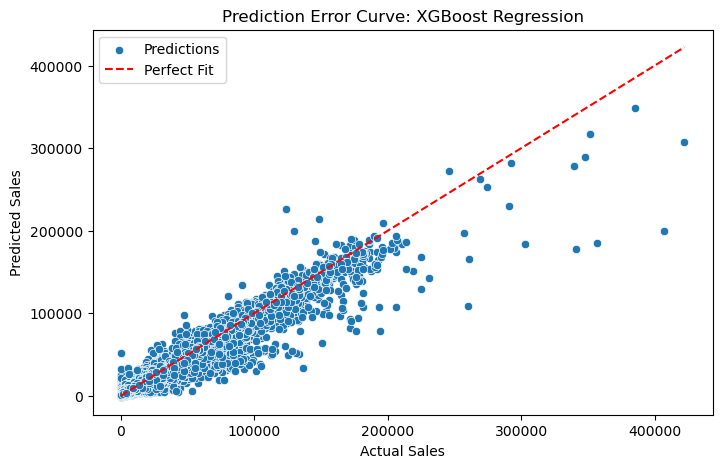

In [157]:
# Prediction Error Curve 
plt.figure(figsize=(8,5)) 
sns.scatterplot(x=y_test, y=y_pred_best_xgb, label="Predictions") 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit") 
plt.xlabel("Actual Sales") 
plt.ylabel("Predicted Sales") 
plt.legend() 
plt.title("Prediction Error Curve: XGBoost Regression") 
plt.show() 

#### - Bagging and Boosting

In [158]:
# Train a Bagging Regressor (with Decision Trees as base models)
bagging_regressor = BaggingRegressor(n_estimators=50, random_state=42, n_jobs=-1)
bagging_regressor.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_regressor.predict(X_test)

# Evaluate Performance
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

# Print Results
print(f"Bagging Regressor:\nMAE: {mae_bagging}\nMSE: {mse_bagging}\nRMSE: {rmse_bagging}\nR²: {r2_bagging}")

Bagging Regressor:
MAE: 1582.8805178048724
MSE: 16994383.077573825
RMSE: 4122.424417448284
R²: 0.9674101361723293


In [159]:
# Train an AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
adaboost_regressor.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_regressor.predict(X_test)

# Evaluate Performance
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

# Print Results
print(f"AdaBoost Regressor:\nMAE: {mae_adaboost}\nMSE: {mse_adaboost}\nRMSE: {rmse_adaboost}\nR²: {r2_adaboost}")

AdaBoost Regressor:
MAE: 15754.663559440321
MSE: 417204265.17464155
RMSE: 20425.578698647478
R²: 0.19993387648726035


In [160]:
# Train a Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_regressor.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm_regressor.predict(X_test)

# Evaluate Performance
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

# Print Results
print(f"Gradient Boosting Regressor:\nMAE: {mae_gbm}\nMSE: {mse_gbm}\nRMSE: {rmse_gbm}\nR²: {r2_gbm}")

Gradient Boosting Regressor:
MAE: 6899.057348426741
MSE: 135812142.60146618
RMSE: 11653.84668688696
R²: 0.739555168709433


In [161]:
# Train a LightGBM Regressor
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_regressor.predict(X_test)

# Evaluate Performance
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Print Results
print(f"LightGBM Regressor:\nMAE: {mae_lgb}\nMSE: {mse_lgb}\nRMSE: {rmse_lgb}\nR²: {r2_lgb}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1606
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 14
[LightGBM] [Info] Start training from score 15979.416984
LightGBM Regressor:
MAE: 4104.4304968875695
MSE: 48114548.495241955
RMSE: 6936.465129678225
R²: 0.9077314794875359


### Test Data Set Prep

In [162]:
test_final.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Month_sin,Month_cos,Days_Since_Start,Type_B,Type_C
0,1,1,False,0.630267,-0.258569,0.457916,1.334573,-0.769185,2.271417,-0.5,0.866025,0,False,False
1,1,1,False,0.630267,0.062335,0.421844,1.335046,-0.769185,3.174318,-0.5,0.866025,7,False,False
2,1,1,False,0.630267,-0.388665,0.390782,1.335853,-0.769185,2.208969,-0.5,0.866025,14,False,False
3,1,1,True,0.630267,-0.209241,0.370240,1.337105,-0.769185,9.450013,-0.5,0.866025,21,False,False
4,1,1,False,0.630267,-0.420105,0.368236,1.338357,-0.769185,1.661283,-0.5,0.866025,28,False,False


In [163]:
# Check if test.csv has the same features as X_train
missing_features = set(X_train.columns) - set(test_final.columns)
extra_features = set(test_final.columns) - set(X_train.columns)

print("Missing Features in test.csv:", missing_features)
print("Extra Features in test.csv:", extra_features)

# If any features are missing, we need to fix it before prediction.

Missing Features in test.csv: set()
Extra Features in test.csv: set()


In [164]:
# Make predictions using the trained XGBoost model
y_pred_test = best_xgb.predict(test_final)

# Add predictions to the test dataset
test_final["Predicted_Weekly_Sales"] = y_pred_test

# Save predictions to a CSV file
test_final.to_csv("test_predictions.csv", index=False)

# Show the first few rows with predictions
test_final.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Month_sin,Month_cos,Days_Since_Start,Type_B,Type_C,Predicted_Weekly_Sales
0,1,1,False,0.630267,-0.258569,0.457916,1.334573,-0.769185,2.271417,-0.5,0.866025,0,False,False,21259.759766
1,1,1,False,0.630267,0.062335,0.421844,1.335046,-0.769185,3.174318,-0.5,0.866025,7,False,False,22347.746094
2,1,1,False,0.630267,-0.388665,0.390782,1.335853,-0.769185,2.208969,-0.5,0.866025,14,False,False,22107.402344
3,1,1,True,0.630267,-0.209241,0.370240,1.337105,-0.769185,9.450013,-0.5,0.866025,21,False,False,22537.404297
4,1,1,False,0.630267,-0.420105,0.368236,1.338357,-0.769185,1.661283,-0.5,0.866025,28,False,False,20901.232422


In [166]:
# # Assuming actual weekly sales are available in 'Actual_Weekly_Sales' column
# mae_test = mean_absolute_error(test_final["Actual_Weekly_Sales"], test_final["Predicted_Weekly_Sales"])
# mse_test = mean_squared_error(test_final["Actual_Weekly_Sales"], test_final["Predicted_Weekly_Sales"])
# rmse_test = np.sqrt(mse_test)
# r2_test = r2_score(test_final["Actual_Weekly_Sales"], test_final["Predicted_Weekly_Sales"])

# # Print results
# print(f"Model Performance on test.csv:\nMAE: {mae_test}\nMSE: {mse_test}\nRMSE: {rmse_test}\nR²: {r2_test}")